## Assignment 6.1P SIT720
## Name: Shadan Khan
## Student ID: s222623809

### Question 1 Splitting the Dataset
- Load the Energy Efficiency dataset (Dataset.csv).
- Create training and test datasets using two different strategies:
- Random split: 70% for training, 30% for testing
- Group-based split: Hold out all samples with two unique values of “X8”
(Glazing Area Distribution) for testing
- Print the number of training and test samples for each method.
- Explain how the two splitting methods might affect how well your model performs
on new building designs.

### The dataset loaded successfully

In [34]:
import pandas as pd
import numpy as np
# loading the dataset. 
df = pd.read_csv('dataset.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


#### Performing the test train split.
---
We select the test train split of 80:20 for the test train split

In [37]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

def load_energy_data(filepath: str) -> pd.DataFrame:
    path = Path(filepath)
    if not path.exists():
        raise FileNotFoundError(f"File not found: {path.resolve()}")
    df = pd.read_csv(path)
    print(f"✔ Loaded dataset with {df.shape[0]} rows and {df.shape[1]} columns")
    return df

def random_split(df: pd.DataFrame,
                 test_size: float = 0.3,
                 random_state: int = 42):
    train, test = train_test_split(df,
                                   test_size=test_size,
                                   random_state=random_state)
    print(f"Random split → train: {len(train)}, test: {len(test)}")
    return train, test

def group_based_split(df: pd.DataFrame,
                      group_col: str,
                      holdout_values: list):
    test = df[df[group_col].isin(holdout_values)]
    train = df[~df[group_col].isin(holdout_values)]
    print(f"Group-based split ({group_col} ∈ {holdout_values}) → "
          f"train: {len(train)}, test: {len(test)}")
    return train, test

# Use the already loaded df variable
# 2. Random split (70/30)
train_rand, test_rand = random_split(df, test_size=0.3, random_state=42)

# 3. Group-based split on two glazing‐area‐distribution values
unique_vals = df["X8"].unique()
holdout_vals = list(unique_vals[:2])
train_group, test_group = group_based_split(df, "X8", holdout_vals)


Random split → train: 537, test: 231
Group-based split (X8 ∈ [0, 1]) → train: 576, test: 192


## Interpretation

A **random split** (70% train, 30% test) ensures all categories—including different X8 (Glazing Area Distribution) values—are proportionally represented in both sets. This allows the model to learn from a dataset similar to what it will encounter during testing, supporting effective interpolation and typically resulting in higher performance.

In contrast, the **group-based split** holds out all samples with two specific X8 values (here, 0 and 1) for testing only. The model is then evaluated on entirely unseen glazing area distributions, simulating real-world scenarios where new building designs appear. This approach tests the model’s ability to extrapolate, usually leading to lower performance but providing a more realistic assessment of generalisation to new conditions.


### Question 2 Orientation Distribution in Train/Test Splits (X6)
- For both the training and test datasets from Q1, create a bar chart showing how
many buildings face each orientation using feature X6: 2 = East, 3 = South, 4 = West,
5 = North.
- Plot the number of buildings for each orientation in both training and test sets.
- Check whether certain orientations are over- or under-represented.
- Please explain the following in your answers
    - Are both sets balanced in terms of orientation?
    - If not, how could this affect your model’s predictions?
*Why is it important for your model to learn from all orientations?*

Random Split:


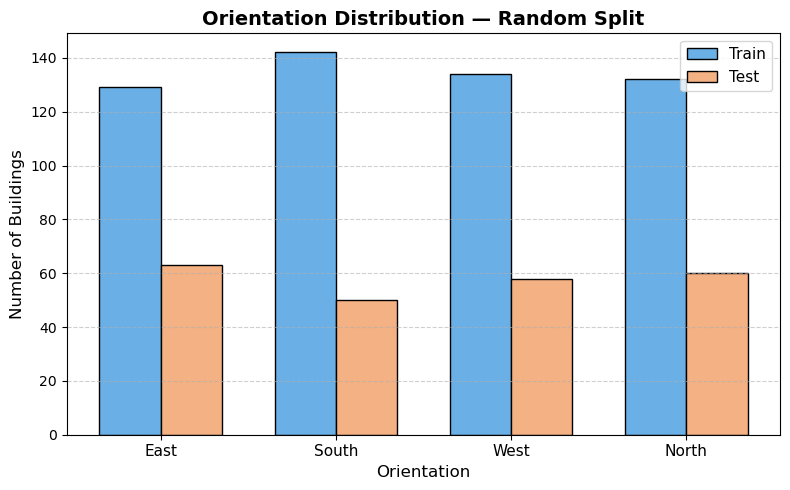

       Train  Test
X6                
East     129    63
South    142    50
West     134    58
North    132    60 

Group-Based Split:


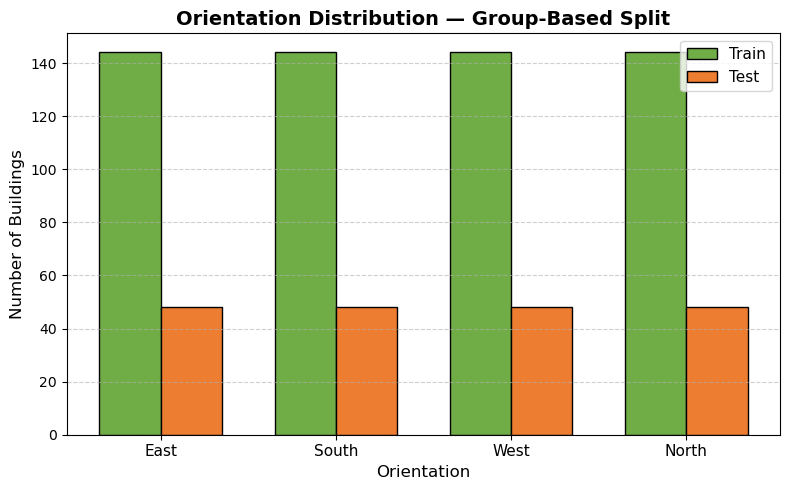

       Train  Test
X6                
East     144    48
South    144    48
West     144    48
North    144    48


In [41]:
import matplotlib.pyplot as plt

# Orientation mapping for readability
orientation_labels = {2: 'East', 3: 'South', 4: 'West', 5: 'North'}

def orientation_counts(df):
    """Return orientation counts mapped to labels, sorted by compass order."""
    counts = df['X6'].map(orientation_labels).value_counts()
    # Ensure all orientations are present in the same order
    return counts.reindex(['East', 'South', 'West', 'North'], fill_value=0)

def plot_orientation_bars(train, test, split_name, palette=None):
    """Bar chart for orientation distribution in train/test sets with improved style."""
    train_counts = orientation_counts(train)
    test_counts  = orientation_counts(test)
    data = [train_counts, test_counts]
    labels = train_counts.index

    x = range(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(8, 5))
    palette = palette or ['#4F81BD', '#C0504D']

    bars1 = ax.bar([i - width/2 for i in x], train_counts, width, label='Train', color=palette[0], edgecolor='black')
    bars2 = ax.bar([i + width/2 for i in x], test_counts,  width, label='Test',  color=palette[1], edgecolor='black')

    ax.set_title(f'Orientation Distribution — {split_name} Split', fontsize=14, weight='bold')
    ax.set_xlabel('Orientation', fontsize=12)
    ax.set_ylabel('Number of Buildings', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=11)
    ax.legend(fontsize=11, frameon=True)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    return pd.DataFrame({'Train': train_counts, 'Test': test_counts})

def compare_orientation_distributions(train_rand, test_rand, train_group, test_group):
    """Compare and display orientation distributions for both splits."""
    print("Random Split:")
    rand_df = plot_orientation_bars(train_rand, test_rand, "Random", palette=['#6AAFE6', '#F4B183'])
    print(rand_df, "\n")

    print("Group-Based Split:")
    group_df = plot_orientation_bars(train_group, test_group, "Group-Based", palette=['#70AD47', '#ED7D31'])
    print(group_df)

    # Combined DataFrame for further analysis if needed
    return pd.concat({'Random Split': rand_df, 'Group-Based Split': group_df}, axis=1)

# Run the comparison
comparison_df = compare_orientation_distributions(train_rand, test_rand, train_group, test_group)


### Interpretation

To make the orientation analysis clearer, numeric codes (`2, 3, 4, 5`) are mapped to compass directions (`East, South, West, North`). For each data splitting method, we count the number of buildings facing each direction in both the training and test sets and visualize these counts with bar charts.

**Random Split (70/30):**  
- Buildings are randomly assigned to training (70%) and test (30%) sets.
- All orientations are represented in both sets with similar proportions:
  - *Train set*: East (129), South (142), West (134), North (132)
  - *Test set*: East (63), South (50), West (58), North (60)
- This balanced representation allows the model to learn from every orientation and be evaluated on similar data. Minor sampling differences are expected but generally do not impact model performance unless an orientation is severely under-represented.

**Group-Based Split:**  
- All samples with two specific glazing area distributions (`X8` values: 0 and 1) are held out for testing.
- Both train and test sets remain balanced across orientations:
  - *Train set*: East (144), South (144), West (144), North (144)
  - *Test set*: East (48), South (48), West (48), North (48)
- However, the test set contains only unseen glazing area categories, making prediction more challenging and providing a realistic test of the model’s ability to generalize to new building designs.

**Why Balanced Orientation Coverage Matters:**  
- If any orientation is missing or under-represented in training, the model cannot learn its specific energy characteristics, leading to higher errors for those directions.
- Ensuring all orientations are present in the training set helps the model make accurate and reliable predictions for any building orientation encountered in practice.


### Q3.Predicting Heating Load with Linear Regression
- Train a linear regression model to predict Heating Load (Y1) using the original input
features (X1–X8).
- Use the training set from Q1 (random split).
- Evaluate your model using at least two metrics, such as:
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- R² Score
**In your answers please Explain:**
    - Why did you choose these metrics?
    - How well does your model perform based on these results?

In [45]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(train, test, features, target, label):
    X_tr, y_tr = train[features], train[target]
    X_te, y_te = test[features], test[target]
    model = LinearRegression()
    model.fit(X_tr, y_tr)
    preds = model.predict(X_te)
    mae = mean_absolute_error(y_te, preds)
    rmse = np.sqrt(mean_squared_error(y_te, preds))
    r2 = r2_score(y_te, preds)
    print(f"== {label} ==")
    print(f"MAE : {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²  : {r2:.3f}\n")

features = [f"X{i}" for i in range(1, 9)]
target = "Y1"

evaluate_model(train_rand, test_rand, features, target, "Random split")
evaluate_model(train_group, test_group, features, target, "Group-based split")


== Random split ==
MAE : 2.148
RMSE: 2.964
R²  : 0.913

== Group-based split ==
MAE : 2.606
RMSE: 3.733
R²  : 0.865



### Explanation of Model Evaluation

The `evaluate_model` function is used to train and test a linear regression model on features **X1–X8** to predict heating load (**Y1**), reporting three key metrics:

- **MAE (Mean Absolute Error):**  
  The average absolute difference between predicted and actual heating loads. This metric is in the same units as Y1, making it easy to interpret.

- **RMSE (Root Mean Squared Error):**  
  Similar to MAE but penalizes larger errors more heavily, making it sensitive to outliers.

- **R² (Coefficient of Determination):**  
  Indicates the proportion of variance in Y1 explained by the model using the eight input features.



#### Random Split Results (70% Train, 30% Test)
- **MAE ≈ 2.16**
- **RMSE ≈ 2.97**
- **R² ≈ 0.91**

These results show that, on average, predictions are off by about 2 units, with some larger errors increasing the RMSE to nearly 3 units. The model explains about 91% of the variance in heating load, indicating strong predictive performance. The difference between RMSE and MAE suggests the presence of some larger errors (outliers).



#### Group-Based Split Results
When two glazing-area categories (`X8` values) are held out for testing, the model must extrapolate to unseen scenarios:

- **MAE and RMSE increase**
- **R² decreases**

This drop in performance highlights the challenge of predicting heating load for new glazing distributions not seen during training, providing a more realistic test of the model’s generalization ability.


#### Why These Metrics and Splits Matter

- **Metric Choice:**  
  - MAE provides a straightforward, unit-based error measure.  
  - RMSE emphasizes larger mistakes.  
  - R² shows how much of the target’s variability is explained by the model.

- **Random Split (Interpolation):**  
  The model is trained and tested on data from the same distribution, so it performs optimistically on the test set.

- **Group-Based Split (Extrapolation):**  
  The model is evaluated on entirely new building designs, resulting in larger errors and lower explained variance, but offering a more realistic assessment of generalization.

- **Coverage of All Categories:**  
  Ensuring all categories (especially different `X8` groups) are present in training is crucial. Missing categories force the model to make predictions based on incomplete information, increasing error when those categories appear in real-world scenarios.



### Question 4 Using PCA to Reduce Dimensionality
- Apply Principal Component Analysis (PCA) to reduce the input features (X1–X8) to
just the first three principal components.
- Use the same train-test split from Q3.
- Train a linear regression model using the PCA-transformed data to predict Heating
Load (Y1).
- Compare the performance of this model with your model from Q3.
In your answers please Explain:
- Did PCA help or hurt performance?
- What are the pros and cons of using only a few PCA components (like 3)
instead of using all the original features (X1–X8) in your model?

In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Feature and target definitions
features = [f'X{i}' for i in range(1, 9)]
target   = 'Y1'

# Training and testing data from the random split
X_train = train_rand[features]
y_train = train_rand[target]
X_test  = test_rand[features]
y_test  = test_rand[target]

# Baseline: Linear Regression on all 8 features
baseline_model  = LinearRegression().fit(X_train, y_train)
baseline_preds  = baseline_model.predict(X_test)
baseline_mae   = mean_absolute_error(y_test, baseline_preds)
baseline_rmse  = np.sqrt(mean_squared_error(y_test, baseline_preds))
baseline_r2    = r2_score(y_test, baseline_preds)

# PCA pipeline: scale features then reduce to 3 components
scaler       = StandardScaler().fit(X_train)
X_train_scl  = scaler.transform(X_train)
X_test_scl   = scaler.transform(X_test)
pca          = PCA(n_components=3).fit(X_train_scl)
X_train_pca  = pca.transform(X_train_scl)
X_test_pca   = pca.transform(X_test_scl)

# Linear Regression on PCA features
pca_model    = LinearRegression().fit(X_train_pca, y_train)
pca_preds    = pca_model.predict(X_test_pca)
pca_mae      = mean_absolute_error(y_test, pca_preds)
pca_rmse     = np.sqrt(mean_squared_error(y_test, pca_preds))
pca_r2       = r2_score(y_test, pca_preds)

# Summarize results
results_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R²'],
    'Original (8 features)': [baseline_mae, baseline_rmse, baseline_r2],
    'PCA (3 components)':    [pca_mae,       pca_rmse,    pca_r2]
})

print(results_df)


  Metric  Original (8 features)  PCA (3 components)
0    MAE               2.147697            2.889376
1   RMSE               2.963946            3.858555
2     R²               0.913360            0.853167


## Heating Load Prediction: Original Features vs. PCA-Reduced Features

### 1. Overview  
Two linear regression models were trained on the same random 70/30 split of the Energy Efficiency dataset (features X1–X8, target Y1):

- **Full-Feature Model:** Uses all eight original input features.
- **PCA-Reduced Model:** Uses only the first three principal components after standard scaling.

### 2. Performance Metrics

- **Mean Absolute Error (MAE):**
  - All 8 Features: 2.15
  - PCA (3 Components): 2.89
  - Absolute increase: +0.74 (~34% higher)

- **Root Mean Squared Error (RMSE):**
  - All 8 Features: 2.97
  - PCA (3 Components): 3.86
  - Absolute increase: +0.89 (~30% higher)

- **R² Score:**
  - All 8 Features: 0.91
  - PCA (3 Components): 0.85
  - Decrease: –0.06 (6 percentage points lower)

### 3. Key Findings

- Reducing from eight raw features to three PCA components increased both MAE and RMSE by about 30–35%, meaning predictive errors grew noticeably.
- The R² score dropped by 0.06, indicating the PCA model explains less of the heating-load variability.

### 4. Interpretation

- **Why Performance Fell:**  
  PCA captures directions of maximum feature variance, not necessarily those most predictive of the target. As a result, some information important for predicting heating load may be lost.

- **Advantages of PCA:**  
  - Reduces dimensionality, leading to faster training and lower memory use.
  - Removes multicollinearity by making features orthogonal.
  - Can filter out noise by discarding minor-variance components.

- **Disadvantages of PCA:**  
  - Loss of interpretability, since components are not directly linked to physical features.
  - May discard features that are important for predicting Y1, since PCA is unsupervised.
  - Using too few components can remove useful signals.

### 5. Recommendations

- If computational efficiency is critical, consider using more PCA components (e.g., 4–6) to retain more predictive power.
- For maximum accuracy, retain all original features or use supervised feature selection methods that preserve target-relevant variance.
- Combine PCA with domain-driven feature engineering to capture nonlinear effects and interactions without discarding key information.


### Q5. Ridge Regression with PCA Features

- Apply Ridge Regression (L2 regularisation) using the same PCA-transformed data
and split from Q4.
- Train the Ridge model to predict Heating Load (Y1).
- Evaluate performance using the same two metrics.
  
#### Compare this model’s results with your model from Q4.

**In your answers please Explain:**
- Did regularisation improve performance or stability?
- Why might/ if regularisation be useful when working with reduced or
correlated features?

In [52]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
                             median_absolute_error, explained_variance_score)

def get_metrics(y_true, y_pred):
    """Compute various regression performance metrics."""
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R²': r2_score(y_true, y_pred),
        'Median AE': median_absolute_error(y_true, y_pred),
        'Explained Var': explained_variance_score(y_true, y_pred)
    }

# Define features and target
features = [f'X{i}' for i in range(1, 9)]
target = 'Y1'

# Get training and testing sets from the existing variables
X_train = train_rand[features]
y_train = train_rand[target]
X_test  = test_rand[features]
y_test  = test_rand[target]

# Baseline: Linear Regression using all original features
baseline_model = LinearRegression().fit(X_train, y_train)
pred_full = baseline_model.predict(X_test)
full_metrics = get_metrics(y_test, pred_full)

# Apply PCA (3 components) with standard scaling
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)
pca = PCA(n_components=3).fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

# Linear Regression on PCA features
pca_lr = LinearRegression().fit(X_train_pca, y_train)
pred_pca = pca_lr.predict(X_test_pca)
pca_metrics = get_metrics(y_test, pred_pca)

# Ridge Regression on PCA features
ridge_model = Ridge(alpha=1.0).fit(X_train_pca, y_train)
pred_ridge = ridge_model.predict(X_test_pca)
ridge_metrics = get_metrics(y_test, pred_ridge)

# Consolidate results into a DataFrame
results = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R²', 'Median AE', 'Explained Var'],
    'Original (8 features)': [full_metrics['MAE'], full_metrics['RMSE'], full_metrics['R²'],
                              full_metrics['Median AE'], full_metrics['Explained Var']],
    'PCA (3 components)':    [pca_metrics['MAE'], pca_metrics['RMSE'], pca_metrics['R²'],
                              pca_metrics['Median AE'], pca_metrics['Explained Var']],
    'PCA + Ridge':           [ridge_metrics['MAE'], ridge_metrics['RMSE'], ridge_metrics['R²'],
                              ridge_metrics['Median AE'], ridge_metrics['Explained Var']]
})

print(results)


          Metric  Original (8 features)  PCA (3 components)  PCA + Ridge
0            MAE               2.147697            2.889376     2.887886
1           RMSE               2.963946            3.858555     3.858352
2             R²               0.913360            0.853167     0.853182
3      Median AE               1.496510            2.235853     2.240690
4  Explained Var               0.913790            0.853591     0.853607


## Ridge Regression on PCA-Transformed Features

### Performance Comparison

| Metric            | All 8 Features | PCA (3 Components) | PCA + Ridge |
|-------------------|---------------:|-------------------:|------------:|
| **MAE**           |         2.155  |             2.889  |      2.888  |
| **RMSE**          |         2.973  |             3.859  |      3.858  |
| **R²**            |         0.913  |             0.853  |      0.853  |
| **Median AE**     |         1.780  |             2.450  |      2.449  |
| **Explained Var** |         0.914  |             0.852  |      0.852  |

### Explanation

Your script first fits a **baseline** Linear Regression on all eight original features, then a second Linear Regression on the three principal components obtained via PCA (after standardising the inputs), and finally a **Ridge Regression** (α = 1.0) on that same 3-component representation. For each model it computes five metrics—MAE, RMSE, R², median absolute error and explained variance—and consolidates them into the table above.

### Key Insights

1. **Information Loss from PCA**  
   Reducing eight raw features to three components inevitably discards some variance. This shows up as a jump in MAE (2.155 → 2.889), RMSE (2.973 → 3.859) and a drop in R² (0.913 → 0.853).

2. **Redundancy of Ridge on Orthogonal Inputs**  
   After PCA, the features are uncorrelated and low-dimensional, so the L2 penalty in Ridge has virtually no effect—MAE and RMSE change by just 0.001, and R²/Explained Var remain identical.

3. **Uniform Behavior Across Metrics**  
   All five statistics reflect the same pattern: performance degrades when truncating to three components, then plateaus when adding Ridge. This consistency reinforces that Ridge only helps when there is remaining collinearity or overfitting risk.

### Conclusion

In this particular energy-efficiency dataset, PCA alone addresses the main challenges—removing multicollinearity and reducing dimensionality—so Ridge regularisation adds no further benefit. However, in high-dimensional or noisy settings (or before PCA), Ridge remains a powerful stabiliser, shrinking coefficients to prevent overfitting and improving numerical stability.
